MODULE 1: DATA COLLECTION AND INITIAL DATA PREPARATION

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./datasets/FWI Dataset.csv")

In [4]:
#Looking into the data
print(df.head())

   day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2  3.9   

   FWI    Classes    Region  
0  0.5  not fire     Bejaia  
1  0.4  not fire     Bejaia  
2  0.1  not fire     Bejaia  
3    0  not fire     Bejaia  
4  0.5  not fire     Bejaia  


In [5]:
print(df.shape)

(244, 15)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB
None


In [7]:
missing_row = df[df.isnull().any(axis=1)]
print(missing_row)

     day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC      DC   ISI  \
165   14      7  2012           37   37   18    0.2  88.9  12.9  14.6 9  12.5   

      BUI      FWI Classes            Region  
165  10.4  fire          NaN  Sidi-Bel Abbes  


In [8]:
df.columns = df.columns.str.strip()

In [9]:
# Filling the Null Value
df['Classes'] = df['Classes'].fillna(df['Classes'].mode()[0])


In [10]:
# Replacing values
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')
df['FWI'] = df['FWI'].fillna(round(df['FWI'].mean(), 2))
df['FWI'] = df['FWI'].astype(float)

In [11]:
# Removing spaces and coverting datatype
df['DC'] = df['DC'].astype(str).str.strip()
df['DC'] = df['DC'].str.replace(' ', '')
df['DC'] = df['DC'].astype(float)

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB
None


In [13]:
df.iloc[165]

day                        14
month                       7
year                     2012
Temperature                37
RH                         37
Ws                         18
Rain                      0.2
FFMC                     88.9
DMC                      12.9
DC                      14.69
ISI                      12.5
BUI                      10.4
FWI                      7.04
Classes               fire   
Region         Sidi-Bel Abbes
Name: 165, dtype: object

MODULE 2: DATA EXPLORATION AND DATA PREPROCESSING

In [14]:
#Finding Duplicate Values
print(df.duplicated().sum())

0


In [15]:
#Analysis
print(df.describe())

              day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.760656   77.887705   14.673361   49.288484    4.774180   16.664754   
std      1.999406   14.337571   12.368039   47.619393 

In [16]:
# Label Encoding
df['Region'] = LabelEncoder().fit_transform(df['Region'])

In [17]:
print(df.tail())

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
239   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
240   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
241   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
242   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
243   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI       Classes  Region  
239  6.5       fire          1  
240  0.0   not fire          1  
241  0.2   not fire          1  
242  0.7   not fire          1  
243  0.5  not fire           1  


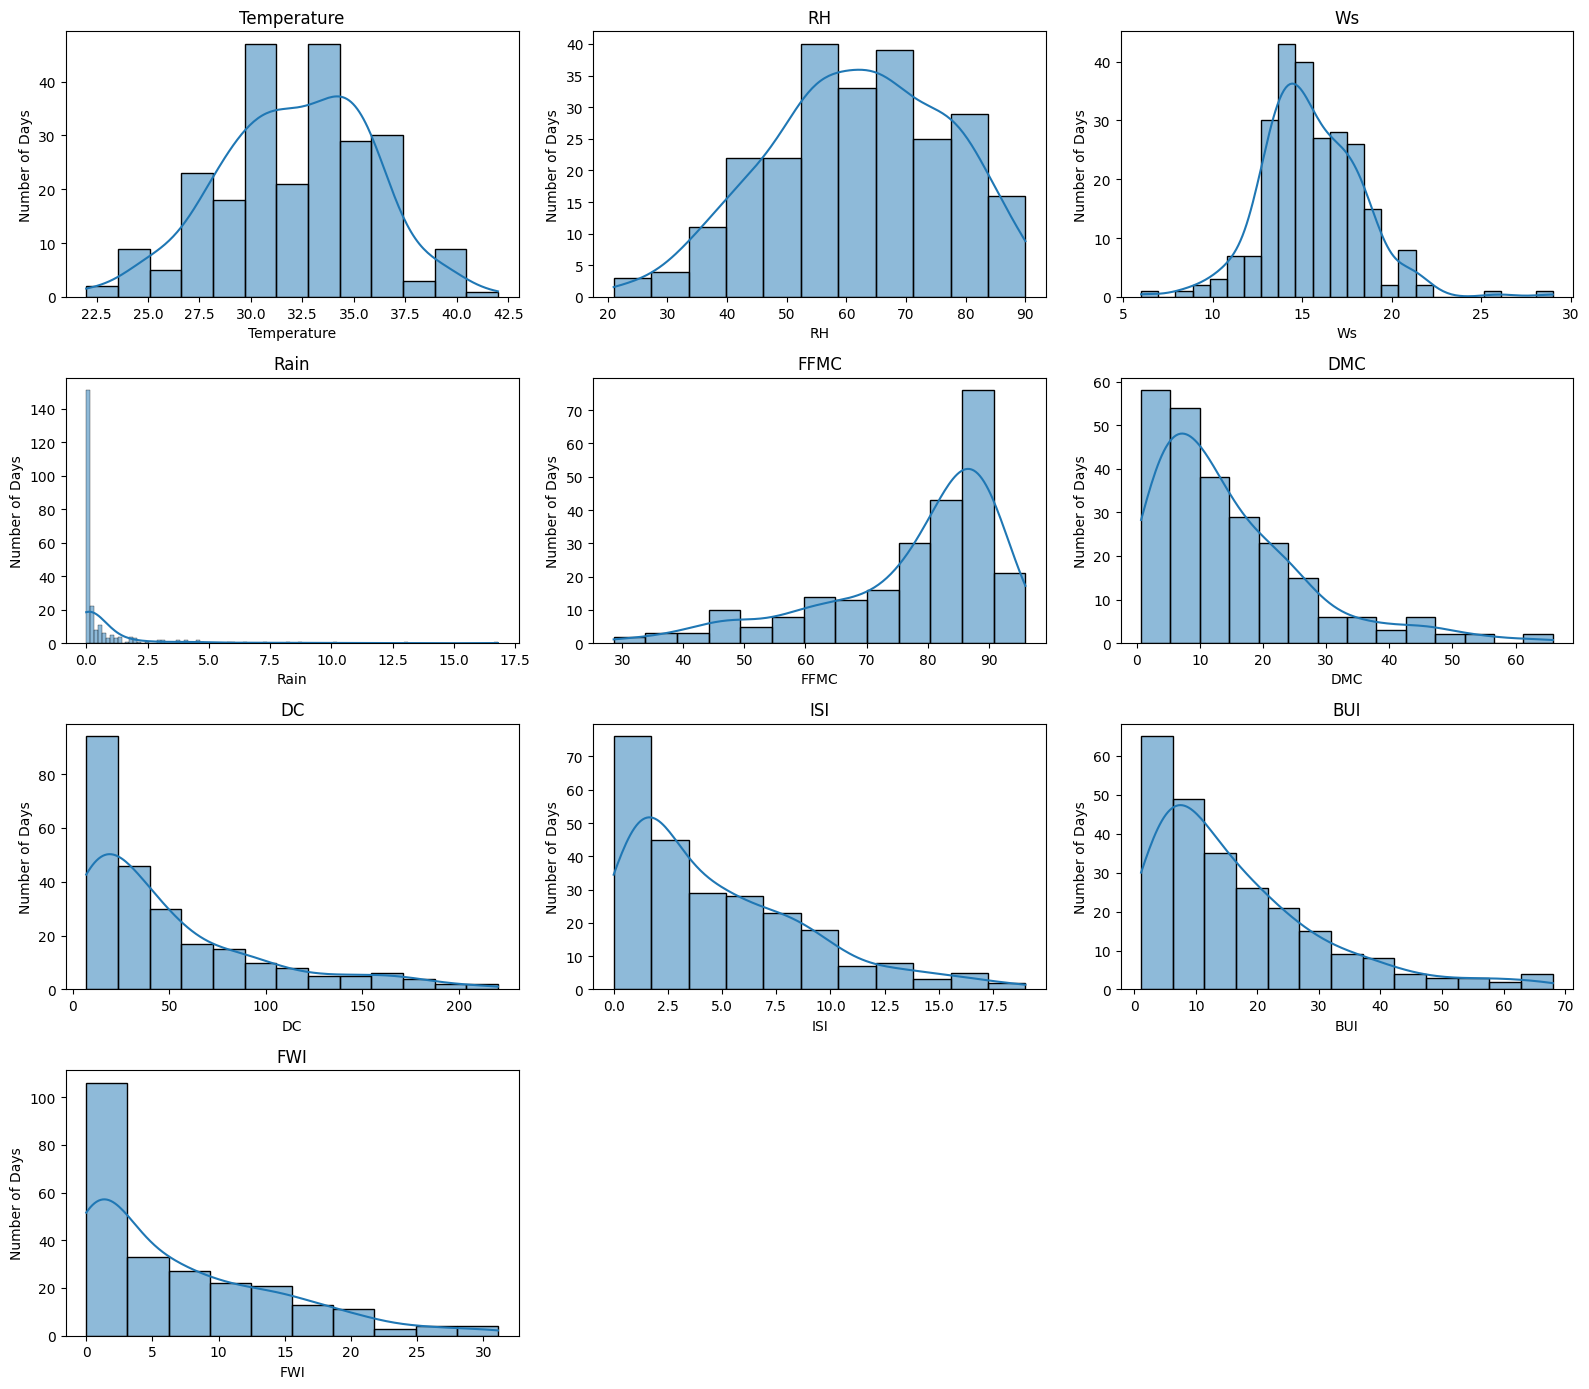

In [18]:
#Histogram 
important_cols = [
    'Temperature', 'RH', 'Ws', 'Rain',
    'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI' 
]

rows = 4
cols = 3

plt.figure(figsize=(16, 14))

for i, col in enumerate(important_cols):
    plt.subplot(rows, cols, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Number of Days")

plt.tight_layout()
plt.show()

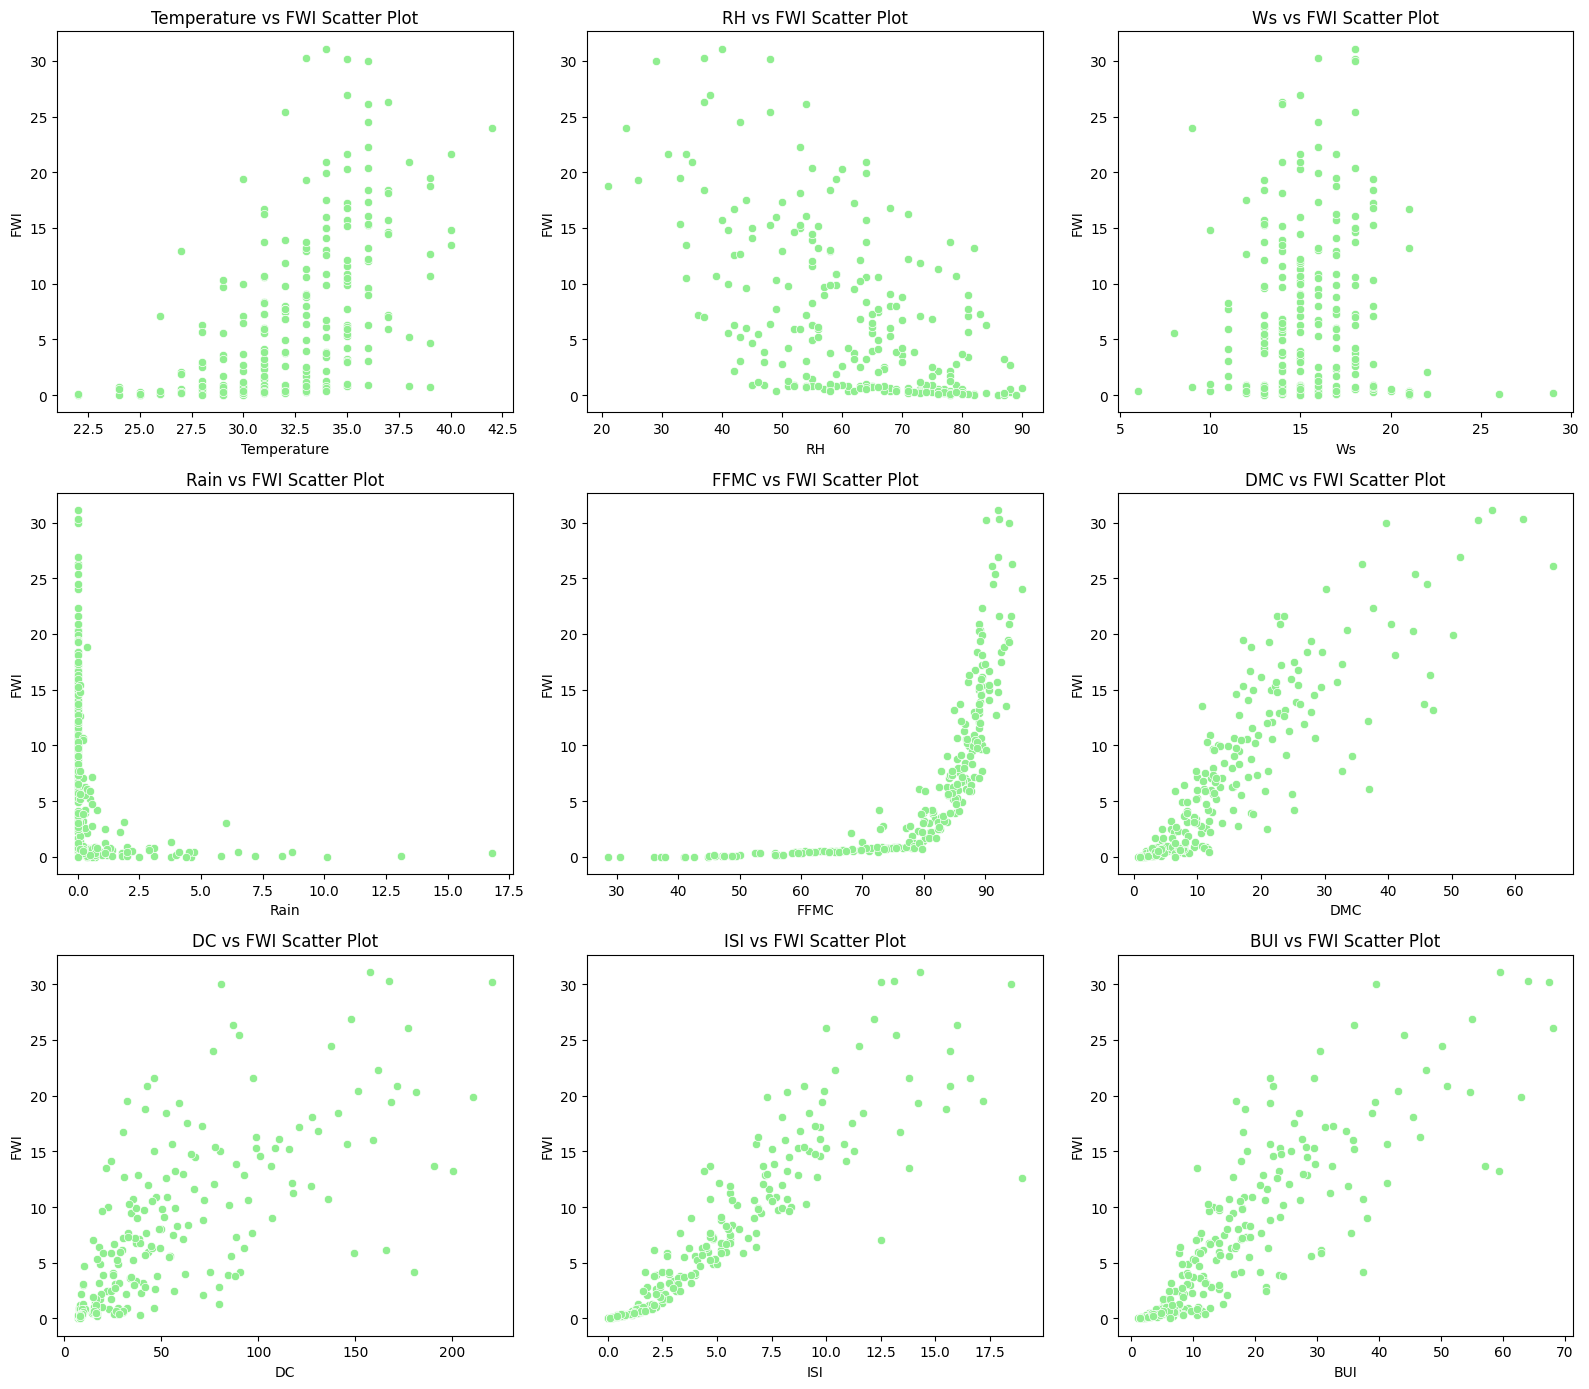

In [19]:
features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']

plt.figure(figsize=(16, 14))

for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[col], y=df['FWI'], color='lightgreen')
    plt.xlabel(col)
    plt.ylabel("FWI")
    plt.title(f"{col} vs FWI Scatter Plot")

plt.tight_layout()
plt.show()

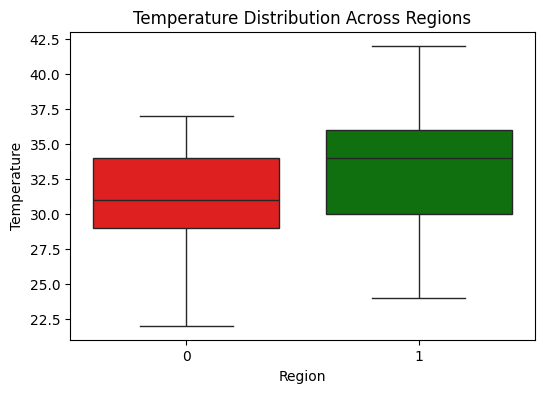

Q1: 30.0
Q3: 35.0
IQR: 5.0
Lower Bound: 22.5
Upper Bound: 42.5
Number of Outliers: 2
     Region  Temperature
93        0           22
105       0           22


In [20]:
#Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x="Region", y="Temperature", hue="Region", data=df, palette=["red", "green"])
plt.title("Temperature Distribution Across Regions")
plt.xlabel("Region")
plt.ylabel("Temperature")
plt.legend([],[], frameon=False)
plt.show()

Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound)]

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Number of Outliers:", len(outliers))
print(outliers[['Region', 'Temperature']])

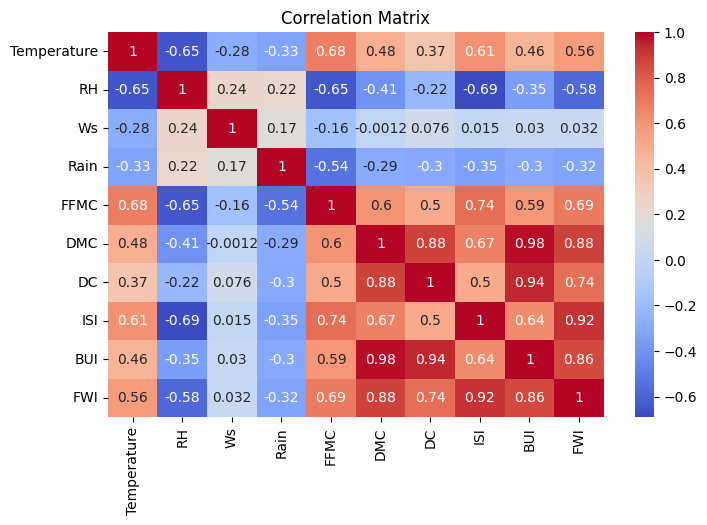

In [21]:
#Heatmap
corr_matrix = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].corr()
plt.figure(figsize=(8, 5))
plt.yticks(rotation=90)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
df = df.drop('Classes', axis=1)

In [23]:
#Saving Cleaned dataset
df.to_csv("./datasets/FWI_Dataset_Cleaned.csv", index=False)

MODULE 3: FEATURE SELECTION AND FEATURE SCALING

In [24]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

In [25]:
df = pd.read_csv("./datasets/FWI_Dataset_Cleaned.csv")

In [26]:
df = df.drop(columns=['Region', 'day', 'month', 'year']) 

In [27]:
#Feature selection and target variable
correlation = df.corr()['FWI'].sort_values(ascending=False)

print(correlation)  

FWI            1.000000
ISI            0.916348
DMC            0.875827
BUI            0.857627
DC             0.738712
FFMC           0.690291
Temperature    0.564603
Ws             0.032317
Rain          -0.324370
RH            -0.577582
Name: FWI, dtype: float64


In [28]:
correlation_threshold = 0.3
selected_features = correlation[correlation.abs() > correlation_threshold].index.tolist()
selected_features.remove('FWI')
selected_features.append('Ws')
print(selected_features)

['ISI', 'DMC', 'BUI', 'DC', 'FFMC', 'Temperature', 'Rain', 'RH', 'Ws']


In [29]:
X = df[selected_features]
y = df['FWI']

In [30]:
#Train and Test dataset splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
#Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
with open("./models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

MODULE 4: MODEL TRAINING AND MODEL EVALUATION

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "ElasticNet Regression": ElasticNet(alpha=0.01, l1_ratio=0.5)
}

In [35]:
#Training the models and evaluating
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

In [36]:
#Model Evaluation according to different models
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2 Score"])
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                   Model       MAE      RMSE  R2 Score
0      Linear Regression  0.500693  0.673129  0.988375
1       Ridge Regression  0.507991  0.685902  0.987929
2       Lasso Regression  0.499089  0.679165  0.988165
3  ElasticNet Regression  0.510524  0.688378  0.987842


In [37]:
#Final Model Selection
final_model = Ridge(alpha=1.0)
final_model.fit(X_train_scaled, y_train)

Ridge()

In [38]:
#Saving the model
with open("./models/ridge.pkl", "wb") as f:
    pickle.dump(final_model, f)